<a href="https://colab.research.google.com/github/beatriz0freitas/PL/blob/main/PL_NB01_Introduction_to_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NB01: Introduction to Language Processing

## Language Processing

## LEI/2025-26

#### Nuno Macedo
Universidade do Minho

# 1.1 Language Processing

## Computer languages

- A **computer language** is any formal language used to communicate with a computer

- It is defined by its:
  - an *alphabet*: symbols from which input strings are built
  - *syntax*: rules that determine what are valid input strings
  - *semantics*: rules that assign precise, unambiguous meaning to input strings

- They differ from *natural languages* by having strict syntax and unambiguous semantics



## Families of computer languages

Computer languages come in many shapes and goals:

- **Programming languages**: C, Java, Haskell, Python, ...
- **Markup languages**: HTML, TeX, Markdown, ...
- **Data exchange formats**: JSON, YAML, XML, ...
- **Modelling languages**: UML, SysML, BPMN, ...
- **Specification languages**: OCL, Alloy, JML, ...
- **Query languages**: SQL, XQuery, SPARQL, ...

They can also be classified by their scope:

- **General-purpose languages** (GPL): defined to be used in all contexts
- **Domain-specific languages** (DSL): specific to a particular application

## Language processing

- **Language processing** is making a machine doing something with a structured text written in a computer language

- It involves turning *text* into a structured **intermediate representation** (IR) and then acting on it

- The main goal is to translate the input language into an output representation

## Example: Programming languages

- Programs are written as *plain text*

- The alphabet is the set of allowed characters
  - Traditionally ASCII, increasingly Unicode

- Not all strings over the alphabet are valid programs
  - Each language defines its own syntax rules

- Programming languages have rich syntax and complex semantics,
making them a quintessential target of language processing

## Compilable vs. Interpreted languages

- Different approaches to language execution
  - Describe *how* programs are processed, not what the language *is*

- **Compilation**
  - Program is translated into another (usually lower-level) language
  - Execution is delegated to a runtime or hardware
  - Compilation can be computationally expensive, but enables global analysis and optimization
  - Typically targets a specific platform or architecture, which may reduce portability

- **Interpretation**
  - Program is executed directly by an interpreter
  - Code is processed incrementally / on-the-fly
  - Usually less efficient than compiled code, fewer opportunities for global optimization
  - More portable, only requires an interpreter on the target machine

- Many languages *combine* both models:
  - Compile to an intermediate representation
  - Then interpret it or compile it just-in-time (JIT)
  - Examples:
    - Python (bytecode + virtual machine)
    - Java (bytecode + JVM)
    - JavaScript (JIT compilation)

## Example: Markup & Data languages

- Not all formal languages are executable
  - Some exist to represent structured information, rather than to be run

- **Markup languages**
  - Annotate text to convey structure or presentation, often also human-readable
  - Examples: HTML, Markdown

- **Data / Interchange languages**
  - Encode structured data for machine processing
  - Examples: XML, JSON, YAML

- Processing these languages involves converting between formats or generating derived outputs

- Configuration files, document generation, and system interoperability all rely on these languages

## Language processing pipeline

- Language processing is a complex task, and is organized as *pipeline*

- Each phase adds structure and reduces ambiguity, implementing classic separation of concerns
  - **Lexical analysis**: split the string into tokens
  - **Syntactic analysis**: check structure against a grammar, build a tree
  - **Semantic elaboration**: enforce rules beyond syntax (types, scopes, consistency)
  - **Transformation**: convert into another representation (may happen multiple times)
  - **Output generation**: produce a result, depending on the goal of the process (compilation, transpilation, interpretation, analysis, visualization, ...)

- In each phase the user must specify what is valid for the language being processed

- Each phase has specific tool support


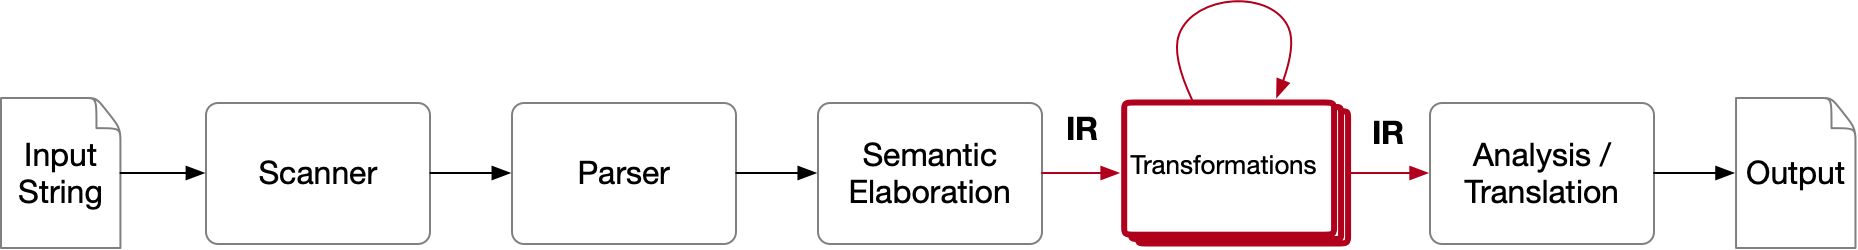

## Example: Python source code

- Input text
  ```python
  for i in range(10): print(i)
  ```

- Tokens, after lexical analysis

  (FOR,`for`), (identifier,`i`), (IN,`in`), (identifier,`range`), (LEFTPAREN,`(`), (number,`10`), (RIGHTPAREN,`)`), (COLON,`:`) (identifier,`print`), (LEFTPAREN,`(`), (identifier,`i`), (RIGHTPAREN,`)`)

- Syntax tree, after syntactical analysis
  ```
  for-loop
  |___ identifier (i)
  |___ expression
  |    |___ function-call
  |         |___ identifier (range)
  |         |___ arguments
  |              |___ number (10)
  |___ block
       |___ function-call
            |___ identifier (print)
            |___ arguments
                 |___ identifier (i)
  ```

- Semantics, attach meaning to the syntax tree
  ```
  for-loop
  |___ identifier (i)                 [bind i : int]
  |___ expression                     [evaluates to iterable]
  |    |___ function-call
  |         |___ identifier (range)   [builtin : int → iterable[int]]
  |         |___ arguments
  |              |___ number (10)     [value = 10]
  |___ block                          [executed once per element]
      |___ function-call
            |___ identifier (print)   [side effect: output]
            |___ arguments
                |___ identifier (i)   [value changes each iteration]
  ```

## What errors can it catch?

- Lexical errors
  ```python
  for 0xy in range(10): print(0xy)
  ```
  ❌ In Python, no token starts by numbers and is followed by alphabetic symbols

- Syntactic errors
  ```python
  for i in range(10) { print(i) }
  ```
  ❌ In Python, blocks cannot be defined with brackets

- Semantic errors
  ```python
  for i in range(10): print(x)
  ```
  ❌ In Python, undefined variables are caught in static time
  ```python
  for i in range(10): print("value: " + i)
  ```
  ❗️ But Python does not perform static type checking, only in runtime


In [ ]:
for i in range(10): print("value: " + i)


TypeError: can only concatenate str (not "int") to str

# 1.2 Formal Languages

- Computer languages are instances of a general concept: **formal languages**

- A formal language is simply a *set of words* over a finite alphabet

- Words must follow well-defined rules (syntax)

- Studying formal languages allows us to:
  - Predict what can be recognized automatically
  - Design compilers, interpreters, and analyzers
  - Understand limits of what computers can do

## Definition

- A formal language $L$ is just a set of *words* (or *strings*), sequences of *symbols* drawn from an *alphabet* $\Sigma$

- Words $x, y, z, \ldots \in \Sigma^*$ are finite sequences of symbols $a, b, c, \ldots \in \Sigma$
  - The length of a word is given by $|w|$
  - The empty word (length 0) is denoted by $\varepsilon$

- A language $L$ is a subset of all possible words, $L \subseteq \Sigma^*$

- The focus is on language *recognition*, how to decide whether a word belongs to the language
  - This is an abstract version of a language processor

- Theory of computation analyses how certain operations can be performed for different classes of languages, and what are their computational limits
  - Does a word $w$ belong to a language $L$?
  - Are two languages $L_1$ and $L_2$ equivalent, i.e., contain the same words?
  - How does the union $\cup$ or intersection $\cap$ of two languages $L_1$ and $L_2$ affect their properties?

- The answer will depend on the class of languages being considered



## Chomsky hierarchy of formal languages

- Languages are classified by structure and expressive power

- Recognition / processing tools, as well as limits to efficiency, vary depending on the class

- Type 3 – Regular
  -	Patterns without nested dependencies
  - Recognized by *finite automata* or *regex engines*
  - Examples: identifiers, numbers, simple commands

- Type 2 – Context-Free
  - Nested, hierarchical structures
  - Recognized by *pushdown automata* or *parsers*
  -	Examples: arithmetic expressions, most programming languages

- Type 1 – Context-Sensitive
  - Rules may depend on context
  - Recognized by *linear bounded automata*
  - Examples: Some programming language constraints (e.g., type checking)

- Type 0 – Recursively Enumerable
  - Most general class of computable languages
  - Recognizable by Turing machines
  - Examples: Any program that can be executed

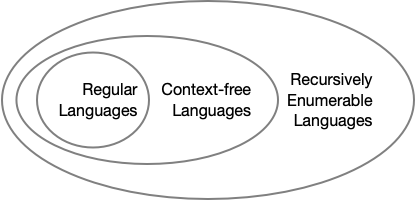

## Example: A Language of Valid Identifiers

- $\Sigma = \{ a, b, c, \ldots, y, z, A, \ldots, X, 0, 1, \ldots 9 \}$

- $\Sigma^* = \{ \varepsilon, a, aa, ab, aaa, \ldots, a0, a00, a01, \ldots, 0, 00, 01, \ldots, 0a, 0aa, \ldots \}$

- $L = \{a, aa, ab, aaa, \ldots, a0, a00, a01, \ldots, \}$

- The language $L$ is *infinite*, but it does not allow all words from $\Sigma^*$

- We cannot enumerate all elements of the language, we need to define a recognizer that answers for a given word yes/no

- This is an example of a regular language, it only restricts how sequences of symbols can appear

## Example: A Language of Paired Parenthesis

- $\Sigma = \{ (, ) \}$

- $\Sigma^* = \{ \varepsilon, (, ((, (((, \ldots, (), ()), (()), \ldots, ()(), (())(, \dots, (())(), \ldots \}$

- $L = \{ \varepsilon, (), (()), \ldots, ()(), (())(), \ldots \}$

- This is an example of a context-free language, it is not regular because it must remember how many parentheses are currently open

- As languages become more expressive, recognizing them requires more resources

## Example: A Non-Context-Free Language

- $\Sigma = \{ a, b, c \}$

- $L = \{ \varepsilon, abc, aabbcc, aaabbbccc, \ldots \}$

- This is an example of a language that is not context-free, recognition requires memory beyond a single stack

- We will not address the recognition of these languages in this course

-- Nuno Macedo